
# PDEs - numerical solution

based on Henning G. Hugdal, Håkon W. Ånes and Jon Andreas Støvneng  
http://www.numfys.net/media/notebooks/partial_differential_equations_two_examples.ipynb

As in the Fourier approach we will look at solutions to the 2D Laplace equation:

$$ \frac{\partial^2V}{\partial x^2}+\frac{\partial^2V}{\partial y^2}=0 \label{eq:1}\tag{1}$$

and how to discretize it with the finite-difference method.

The Laplace equation can be discretized by using the following scheme:

1. First we discretize the $x$- and $y$-axis using $x_i = x_{min} + i\Delta x$, $i\in[0,N_x]$, and $y_j = y_{min} + j\Delta y$, $j\in[0,N_y]$, with:

$$\Delta x = (x_{max}-x_{min})/N_x $$
and 
$$\Delta y = (y_{max}-y_{min})/N_y$$ 

2. Using this, we discretize $V$ by $V(x_i, y_j) = V_{i,j}$. 


This gives for the second derivative with respect to $x$:

$$\frac{\partial^2 V}{\partial x^2} \rightarrow \frac{V_{i+1,j} - 2V_{i,j} + V_{i-1,j}}{\Delta x^2},$$

and similarly for the second derivative with respect to $y$:

$$\frac{\partial^2 V}{\partial y^2} \rightarrow \frac{V_{i,j+1} - 2V_{i,j} + V_{i,j-1}}{\Delta y^2}.$$

and thus the 
### discretized Laplace equation

$$\frac{V_{i+1,j} - 2V_{i,j} + V_{i-1,j}}{\Delta x^2} +
\frac{V_{i,j+1} - 2V_{i,j} + V_{i,j-1}}{\Delta y^2} = 0$$

We can try to solve the above equation with the same boundary conditions as in the Fourier approach:

- $V(x,0) = 0$

- $V(x,a) = 0$

- $V(0,y) = V_0$

- $V\rightarrow0$ as $x\rightarrow \infty$

Now we have to discretize the region where we are interested in solutions.

<img src="grid.png">

### Discretization of the $x$- and $y$-axis:

- $x_i = (1+i)\Delta x$, with $\Delta x = \frac{1}{N_x+1}$ and $i\in [0, N_x]$.

- $y_j = (1+j)\Delta y$, with $\Delta y = \frac{1}{N_y+2}$ and $j \in [0, N_y]$.

Let us now treat the various boundary cases:

- For $i=0$ we get
    $$\frac{V_{0,j+1} -2V_{0,j} + V_{0,j-1}}{\Delta y^2} + \frac{V_{1,j} -2V_{0,j} + V_c}{\Delta x^2} = 0,$$
    where $V_{-1,j}$ has been replaced by the function at the left boundary, $V_c$ (here = $V_0$).
    
- For $j=0$ we get
    $$\frac{V_{i,1} -2V_{i,0} + V_a}{\Delta y^2} + \frac{u_{i+1,0} -2V_{i,0} + V_{i-1,0}}{\Delta x^2} = 0,$$
    where $V_{i,-1}$ has been replaced by the value at the bottom boundary, $V_a$ (here = 0).
    
- For $j=N_y$ we get
    $$\frac{V_b -2V_{i,N_y} + V_{i,N_y-1}}{\Delta y^2} + \frac{V_{i+1,N_y} -2V_{i,N_y} + V_{i-1,N_y}}{\Delta x^2} = 0,$$
    where $V_{i,N_y+1}$ has been replaced by the value at the top boundary, $V_b$ (here = 0).
    
    
-  For $i=N_x$ we get
      $$\frac{u_{N_x,j+1} -2u_{N_x,j} + u_{N_x,j-1}}{\Delta y^2} + \frac{u_{N_x+1,j} -2u_{N_x,j} + u_{N_x-1,j}}{\Delta x^2} = 0.$$
      
      
if we assume $N_x$ is very large. Another possibitlity is to substitute this bundary condition with a von Neuman BC which descibes the derivative and not a value for a boundary. Here we could write:

$$ \frac{\partial V(x,y)}{\partial x}\Big|_{x=N_x}=0 $$

so we can discretize the boundary condition,
$$ \frac{\partial V(x,y)}{\partial x} \rightarrow \frac{u_{i+1,j} - u_{i-1,j}}{2\Delta x},$$

which gives at the boundary
$$\frac{V_{N+1,j} - V_{N-1,j}}{2\Delta x} = 0.$$

Hence we get that $V_{N+1,j} = V_{N-1,j}$, and get the following equation at the right boundary:
$$\frac{V_{N_x,j+1} -2V_{N_x,j} + V_{N_x,j-1}}{\Delta y^2} + \frac{-2V_{N_x,j} + 2V_{N_x-1,j}}{\Delta x^2} = 0.$$

Notice that we get a factor $2$ in front of $V_{N_x-1,j}$.

In the above, all constants will be moved to the right hand side, and hence make up the vector ${\bf{b}}$ in the matrix equation
$$A{\bf{V}} = {\bf{b}}.$$
It is also important to note, that in the corners of the domain, i.e. at the points $(i,j) = (0,0)$, $(N_y,0)$, $(0,N_x)$ and $(N_y,N_x)$ we must combine two of the above boundary conditions.

We can now start constructing the matrix equation using the above results. For simplicity we will set $\Delta x = \Delta y$, which allows us to multiply them out. We then get
$$\left(\matrix{
-4 & 1 & 0 &0 &...& 0 & 1 & 0 &0&...\\
1 & -4 & 1  &0&...& 0 & 0 & 1 &0&...\\
0& 1 & -4& 1& ...& 0 &0&0&1&...\\
\vdots& \vdots& \vdots& \vdots& \vdots& \vdots &\vdots&\vdots&\vdots&\ddots&
}\right)
\left(\matrix{
V_{0,0}\\
V_{1,0}\\
V_{2,0}\\
\vdots\\
V_{N_x,0}\\
V_{0,1}\\
V_{1,1}\\
V_{1,2}\\
\vdots
}\right) = \left(\matrix{
-V_c-V_a\\
-V_a\\
-V_a\\ \vdots}\right)$$
Here A is a pentadiagonal, $N\times N$-matrix, with $N=N_x\cdot N_y$, and ${\bf b}$ is a vector with length $N$.

### Implementation:

In [1]:
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

In [2]:
# Set the number of grid points
Nx = 20
dx = 1/(Nx+1)
x = np.linspace(dx, 1, Nx+1)

dy = dx
Ny = int(1/dy - 2)
N = (Nx+1)*(Ny+1)
y = np.linspace(dy, 1-dx, Ny+1)

# Set constants at boundary
Va = 0
Vb = 0
Vc = 1 # V0

### Construct the matrix A
A = np.zeros([N,N])

for i in range(N):
    # Set the diagonals to -4
    A[i, i] = -4
    # Set the non-zero off-diagonals to 1
    if i > 0:
        A[i, i-1] = 1
    if i < N-1:
        A[i, i+1] = 1
    if i < N-Nx-1:
        A[i+Nx+1, i] = 1
        A[i, i+Nx+1] = 1
    
for i in range(N):
    # Some elements must be changed to 2 due to the Neumann BCs
    if (i+1)%(Nx+1) == 0:
        A[i,i-1] = 2
    
    # In addition some elements must be set to zero, since
    # the elements are taken care of by terms in b
    if i > 0 and i < N - 1 and (i+1)%(Nx+1) == 0:
        A[i, i+1] = 0
        A[i+1, i] = 0

### Construct the right hand side vector b:
b = np.zeros(N)

# For j = 0, set elements to -Va
b[0:Nx+1] = - Va

# For i = 0, set the elements to -Vc
indices = np.mod(range(N),Nx+1) == 0
b[indices] += -Vc

# For j = Ny, set elements to -ub(x_i)
for i in range(Nx+1):
    b[N-Nx-1+i] += -Vb

Finally, we solve the matrix equation using ``linalg.solve()``, and plot the result.

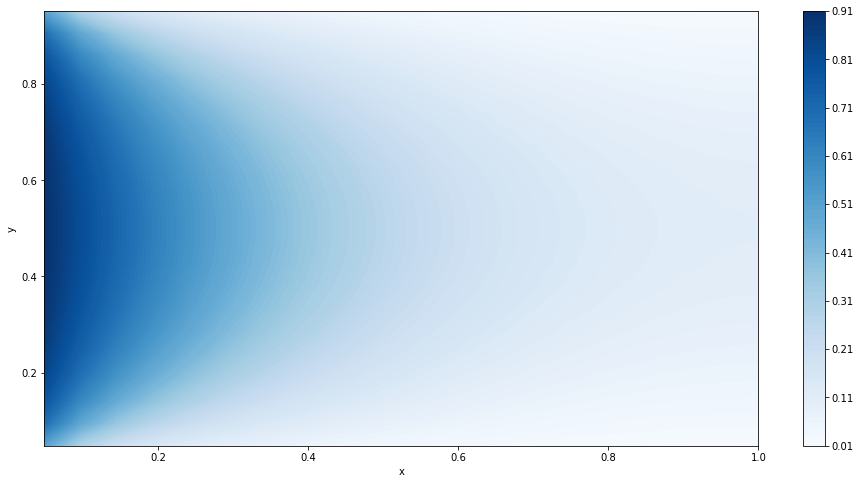

In [3]:
# Solve the system using linalg
u = linalg.solve(A,b)
X,Y = np.meshgrid(x,y)
# Reshape solution array to be able to plot it
u_ = u.reshape(Ny+1,Nx+1)
plt.figure(figsize=(16, 8))
plt.contourf(X, Y, u_, 100,cmap='Blues')
plt.colorbar()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

<IPython.core.display.Javascript object>


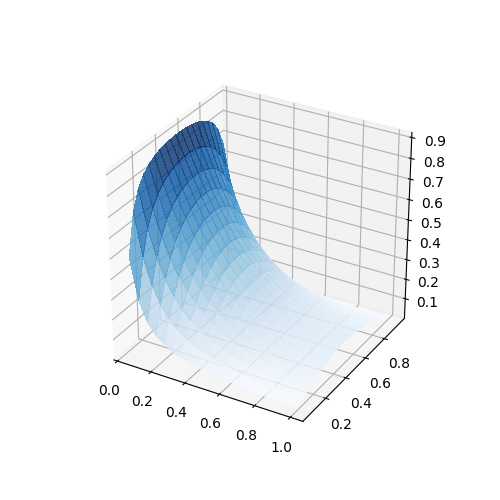

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5.,5.))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, u_, cmap='Blues', alpha=0.8,linewidth=0, antialiased=False)